3.9093400000000003
1.9741019640332664


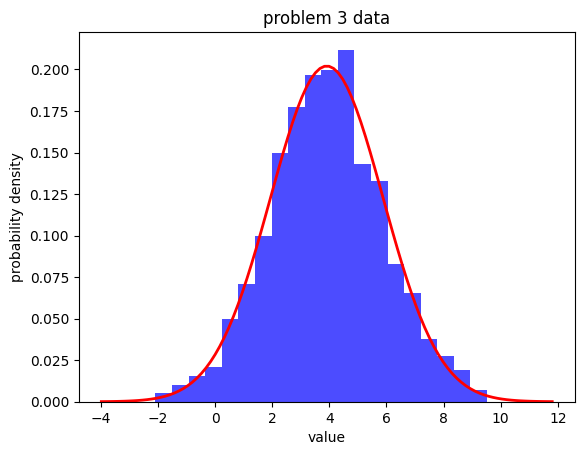

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

samples = genfromtxt('problem_3_data.csv', delimiter='\n')
n = len(samples)

plt.hist(samples, 20, density=True, facecolor ='blue', alpha = .7)

mu = np.mean(samples)
sd = np.std(samples)

## PART 1) based on the historgram, i'd use GAUSSIAN DISTRIBUTION

x = np.linspace(mu - 4 * sd, mu + 4 * sd, 100)
y = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sd) ** 2)
plt.plot(x, y, color='red', linewidth=2)
plt.title('problem 3 data')
plt.xlabel('value')
plt.ylabel('probability density')
plt.show()


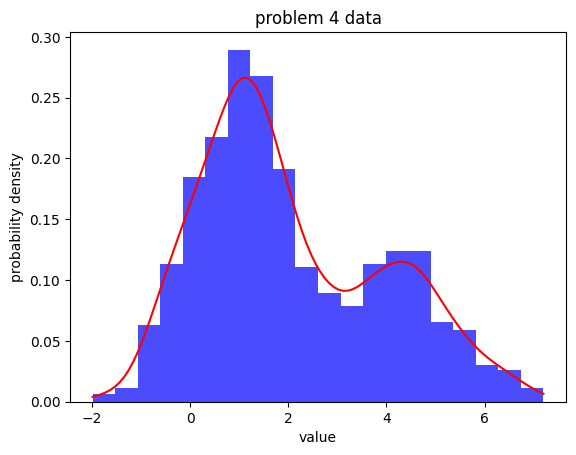

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

samples = genfromtxt('problem_4_data.csv', delimiter='\n')
n = len(samples)

plt.hist(samples, 20, density=True, facecolor ='blue', alpha = .7)

mu = np.mean(samples)
sd = np.std(samples)

def gaussian(μ,σ,x):
	return (np.exp(-(x-μ)**2/(2*σ**2))/(np.sqrt(2*np.pi)*σ))

pdf = 0
σ = 0.4
x = np.linspace(np.min(samples),np.max(samples),100)

for i in range(n):
	pdf += gaussian(samples[i],σ,x)
pdf = pdf/n
plt.plot(x,pdf,color='red')
plt.title('problem 4 data')
plt.xlabel('value')
plt.ylabel('probability density')
plt.show()

In [21]:
import numpy as np
from numpy.random import rand
from scipy.integrate import quad
from scipy.stats import expon
def f(x):
    return x**2 - 3*x + 4

## PART 1: Using Python To Solve Integral 
result, err = quad(f, 0, 2)
print ('automatic integral: %.5f' %result)

## PART 2: Using Sampling to Solve Integral
a = 0
b = 2
N = 20000
x_samples = np.random.uniform(a, b, N)
f_samples = f(x_samples)
integral_approximation = np.mean(f_samples) * (b - a)
print("sampling approximated integral: %.5f" %integral_approximation)

# PART 3: Using Rejection Sampling for Integral
def rejection_sampling(f, a, b, N):
    max_f = max(f(np.linspace(a, b, 1000)))  # Estimate the maximum of f within the interval
    x_samples = []
    count_accepted = 0
    while count_accepted < N:
        x = np.random.uniform(a, b)
        y = np.random.uniform(0, max_f)
        if y < f(x):
            x_samples.append(x)
            count_accepted += 1
    return np.array(x_samples)

x_samples_rejection = rejection_sampling(f, a, b, N)
integral_approximation_rejection = np.mean(f(x_samples_rejection)) * (b - a)
print("Rejection sampling approximated integral: %.5f" %integral_approximation_rejection)

# PART 4: Using Importance Sampling to Solve Integral
def g(x):
    return f(x) * np.exp(-x**2 / 2)

n = 100000
samples_q = np.random.normal(0, 1, n)
weights = g(samples_q)
importanc_sample = np.mean(weights)
print("Importance sampling approximated integral: %.5f" %importanc_sample)


automatic integral: 4.66667
sampling approximated integral: 4.66758
Rejection sampling approximated integral: 5.02920
Importance sampling approximated integral: 3.18076


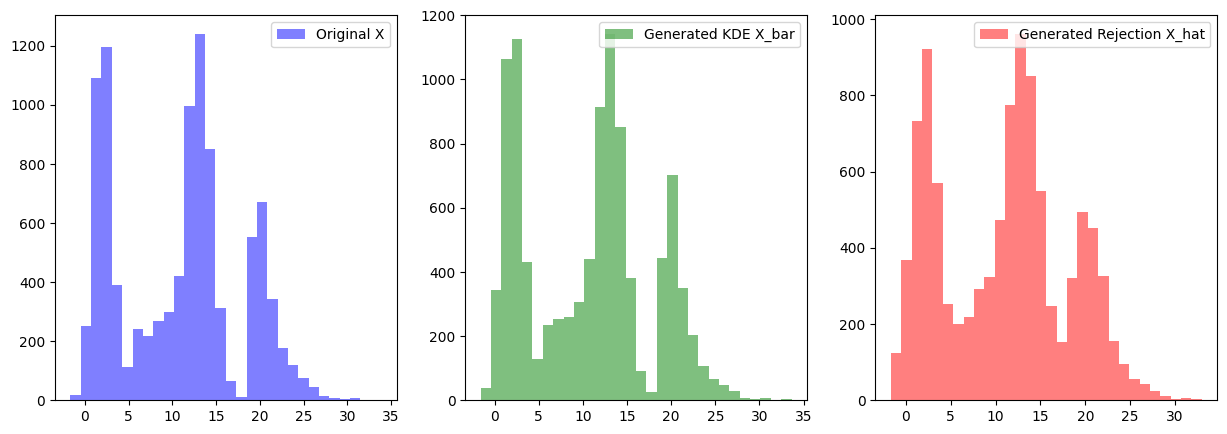

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

X = np.genfromtxt('complex_distribution.csv', delimiter=',')

## gaussian function 
def gaussian(x, sigma, x_i): 
    return np.exp(-(x - x_i)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

# KDE params
sigma = 0.4
n = len(X)

x_range = np.linspace(min(X), max(X), 1000)
pdf = np.zeros_like(x_range)
for i in range(n):
    pdf += gaussian(x_range, sigma, X[i])
pdf /= n

kde = gaussian_kde(X)

# q(x) using KDE
def q(x):
    return kde.evaluate(x)

# some contant k such that k * q(x) > p(x)
k = 2

#  samples using rejection sampling
N = len(X)
samples_rejection = []
max_p_x = kde.evaluate(X).max()  
while len(samples_rejection) < N:
    u = np.random.uniform(min(X), max(X)) # sample from q(x)
    v = np.random.uniform(0, max_p_x) # sample from the uniform distribution from 0 to the end of the density func
    if v <= kde.evaluate(u): # accept ONLY if v < q(u)
        samples_rejection.append(u)
        
samples_rejection = np.array(samples_rejection) 

# samples using KDE sampling
samples_kde = np.random.choice(x_range, size=N, p=pdf/pdf.sum())

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(X, bins=30, alpha=0.5, color='blue', label='Original X')
plt.legend()
plt.subplot(1, 3, 2)
plt.hist(samples_kde, bins=30, alpha=0.5, color='green', label='Generated KDE X_bar')
plt.legend()
plt.subplot(1, 3, 3)
plt.hist(samples_rejection, bins=30, alpha=0.5, color='red', label='Generated Rejection X_hat')
plt.legend()
plt.show()


In [7]:
def func1(x):
    return 3*x + 2

def func2(x):
    return x**2 - 5*x

def func3(x):
    return 2*np.exp(x) + 1

# Calculate Expectations of functions

# 4.3) ORIGINAL SAMPLES X
print("X Expectation E[X]:", np.mean(X))
print("X Population Variance Var[X]:", np.var(X))
print("X E[3x + 2]:", np.mean(func1(X)))
print("X E[x^2 - 5x]:", np.mean(func2(X)))
print("X E[2e^x + 1]:", np.mean(func3(X)), '\n')

# 4.4) KDE SAMPLES X HAT
print("X_hat Expectation E[X_hat]:", np.mean(samples_kde))
print("X_hat Population Variance Var[X_hat]:", np.var(samples_kde))
print("X_hat E[3x + 2]:", np.mean(func1(samples_kde)))
print("X_hat E[x^2 - 5x]:", np.mean(func2(samples_kde)))
print("X_hat E[2e^x + 1]:", np.mean(func3(samples_kde)), '\n')

# 4.5) REJECTION SAMPLES X BAR
print("X_bar Expectation E[X_bar]:", np.mean(samples_rejection))
print("X_bar Population Variance Var[X_bar]:", np.var(samples_rejection))
print("X_bar E[3x + 2]:", np.mean(func1(samples_rejection)))
print("X_bar E[x^2 - 5x]:", np.mean(func2(samples_rejection)))
print("X_bar E[2e^x + 1]:", np.mean(func3(samples_rejection)))

X Expectation E[X]: 10.814000119911924
X Population Variance Var[X]: 49.40961360042826
X E[3x + 2]: 34.44200035973577
X E[x^2 - 5x]: 112.28221159432371
X E[2e^x + 1]: 258969297984.54385 

X_hat Expectation E[X_hat]: 10.701274391600503
X_hat Population Variance Var[X_hat]: 49.70112956778934
X_hat E[3x + 2]: 34.103823174801505
X_hat E[x^2 - 5x]: 110.71203121411152
X_hat E[2e^x + 1]: 300983816541.8072 

X_bar Expectation E[X_bar]: 10.960020392972528
X_bar Population Variance Var[X_bar]: 50.19746066893647
X_bar E[3x + 2]: 34.880061178917586
X_bar E[x^2 - 5x]: 115.5194057184475
X_bar E[2e^x + 1]: 162942789960.0483


In [11]:
import numpy as np
n = 100000

## QUESTION 5) integral from 0 to 2 of ln(x+1)  
samples = np.random.uniform(0, 2, n) # genearate samples within the integral range

f_vals = np.log(samples + 1)  # compute f(x) with the generated samples

ans = 2 * np.mean(f_vals) # 2 E[f(x)] = the integral of f(x) from 0 to 2! 

print("Value of the integral through sampling: %.3f" %ans)

## QUESTION 6) integral from 0 to 1 of x^2 - x + 1 
samples = np.random.uniform(0, 1, n) # genearate samples within the integral range

f_vals = samples**2 - samples + 1  # compute f(x) with the generated samples

# Approximate the integral using the average of f(x) values
ans = np.mean(f_vals) # 1 * E[f(x)] = the integral of f(x) from 0 to 1! 

print("Value of the integral through sampling: %.3f" %ans)

Value of the integral through sampling: 1.294
Value of the integral through sampling: 0.833
